## Galactic Plane Survey Footprint

To first order, the spatial distribution of many classes of stellar variables follows the distribution of stars in the Milky Way and Magellanic Clouds.  The cadence with which these regions are surveyed during LSST is therefore the single most impactful factor determining how complete a sample of these objects will be discovered and accurately classified.  

Many of the White Papers on LSST survey strategy (https://www.lsst.org/submitted-whitepaper-2018) identified specific regions within the Galactic Plane and Magellanic Clouds that are high priority for a range of scientific drivers.  Comparing these regions indicated substantial overlap between them, suggesting that a single common region of interest could be defined, which, if surveyed by Rubin, would address many science cases at once.  

Street et al. 2021 https://docushare.lsst.org/docushare/dsweb/Get/Document-37639/Galactic_Plane_Footprint.pdf described a procedure whereby this common region of interest was established by representing all of the survey regions recommended in the separate White Papers as HEALpix maps.  In each case, a numerical priority was assigned to each HEALpix in the map corresponding to whether it lay inside or outside the region of interest to the authors of the White Paper.  A combined TVS/SMWLV Galactic Plane priority map in each filter passband was produced by a weighted sum of the HEALpix maps for each science case.  

The software to generate the priority maps can be found in:
    https://github.com/LSST-TVSSC/software_tools
    
Specifically:
    generate_galplane_priority_maps.py
    science_priority_regions.py

The priority maps themselves can be found in:
    https://github.com/LSST-TVSSC/software_tools/footprint_maps

In [1]:
from os import getenv, path
import numpy as np
import healpy as hp
from healpy.newvisufunc import projview, newprojplot
import science_priority_regions
import generate_galplane_priority_maps
from astropy_healpix import HEALPix
from astropy.coordinates import Galactic, TETE, SkyCoord
from astropy import units as u
import matplotlib.pyplot as plt
%matplotlib inline

### Tuning the Survey Footprint

While the above maps represent an idealized survey footprint for Milky Way and Magellanic Cloud science, it is recognized that they include a large area and that it may not be possible to cover all of it at a uniformly high cadence.  

The maps are contructed in such a way that each HEALpix value can be used as a proxy the scientific value of surveying that pixel, meaning that the maps can be used to adjust the survey footprint to the highest-priority areas with suitable selection cuts. 

Here we use the SDSS-i-band priority map as an example, and illustrate the change in survey footprint when different priority thresholds are applied.  

In [2]:
NSIDE = 64
footprint_maps_dir = getenv('FOOTPRINT_MAPS_DIR')
GP_footprint1 = hp.read_map(path.join(footprint_maps_dir,'maps_no_pencilbeams','GalPlane_priority_map_i.fits'), dtype=np.float64)


In [3]:
def galPlane_survey_footprint(GP_footprint, healpix_priority_minimum_threshold = 0.25):
    galwfd = np.where(GP_footprint >= healpix_priority_minimum_threshold,1,0)
    return galwfd

Figure 1: Galactic Plane Survey Footprint with Minimum Priority=0.25


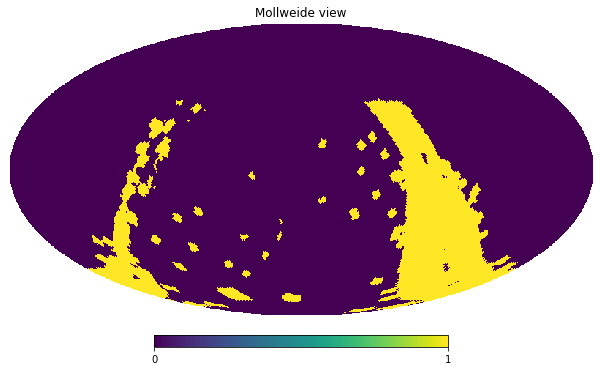

In [4]:
galwfd = galPlane_survey_footprint(GP_footprint1, healpix_priority_minimum_threshold = 0.25)
hp.mollview(galwfd, max=1)
print('Figure 1: Galactic Plane Survey Footprint with Minimum Priority=0.25')

Figure 2: Galactic Plane Survey Footprint with Minimum Priority=0.75


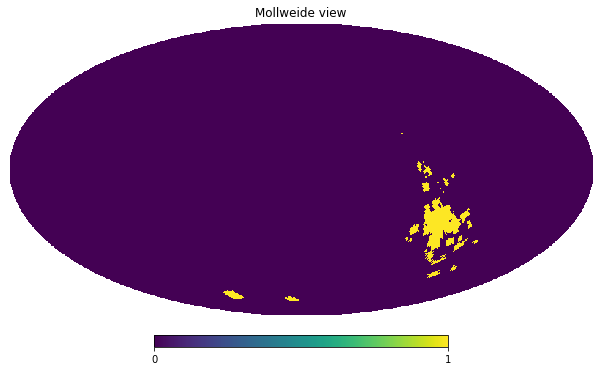

In [5]:
galwfd = galPlane_survey_footprint(GP_footprint1,healpix_priority_minimum_threshold = 0.75)
hp.mollview(galwfd, max=1)
print('Figure 2: Galactic Plane Survey Footprint with Minimum Priority=0.75')

### Galactic Pencilbeams Fields

Selecting only the very highest-priority regions from the map highlights the many science drivers that focus on the Galactic Bulge and central region and the Magellanic Clouds, accurately reflecting many of the arguments presented in the White Papers.  

However, applying this simple selection threshold alone has a key flaw, as it does not take into account the need to compare populations between different regions of the Galaxy.  

Stellar populations varying throughout the Galaxy as a function of trends in metallicity, age and dynamics.  The distributions of all forms of variable stars, as well as the occurrance of transient phenomena such as microlensing by stars, planets and black holes, reflect these trends.  One of LSST's most distinctive capabilities will be to survey both over large regions and to faint limiting magnitudes, thereby enabling comparative studies of stellar populations in different evolutionary environments.  Two of Rubin's primary science goals - properly mapping the Milky Way, and exploring the transient optical sky - depend on ensuring adequate coverage of a range of stellar environments.  

If scheduling pressures in LSST were to result in Rubin Observatory surveying just the very-high-priority regions in Fig. 2, these comparative studies would be severely compromised by the limited survey footprint outside the Bulge and Magellanic Clouds.  

To mitigate this concern, without requiring Rubin to survey the entire Galactic Plane at high cadence, we propose to add to the priority map a sequence of pencilbeam fields, each representing a single pointing of LSSTCam.  

By surveying a number of Rubin field pointings, all centered at Galactic Latitude ~0deg but distributed in Galactic Longitude between -85 to +85deg, we can ensure that we sample a range of stellar environments.  With the same observations, we also sample different lines of sight through the Galaxy, allowing us to directly compare their the populations of lenses, as well as a variety of variable stars, thus mapping Galactic structure.  

The selection of the pencilbeam fields is described in the notebook galactic_pencilbeams.ipynb. 

These pencilbeam fields have been added to the galactic priority maps.  To illustrate this, we replot Fig.2 using the same selection priority cut with the amended maps. 

Figure 3: Galactic Plane Survey Footprint, with pencilbeams, Minimum Priority=0.75


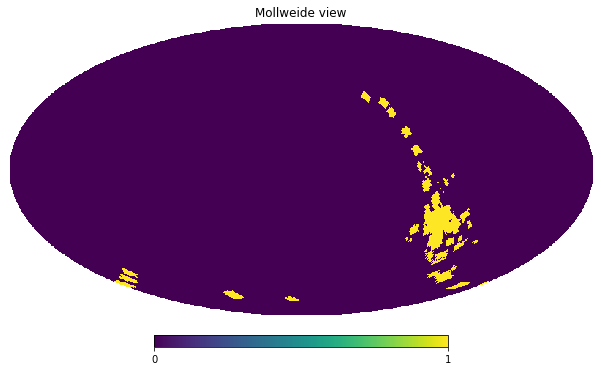

In [8]:
GP_footprint2 = hp.read_map(path.join(footprint_maps_dir,'GalPlane_priority_map_i.fits'), dtype=np.float64)
galwfd = galPlane_survey_footprint(GP_footprint2,healpix_priority_minimum_threshold = 0.75)
hp.mollview(galwfd, max=1)
print('Figure 3: Galactic Plane Survey Footprint, with pencilbeams, Minimum Priority=0.75')